# Simplex Algorithm

Steps:

1. Convert the equations and constraints to **standard form**; add **slack variables**.

2. Set initial simplex **tableau** using the objective function and **slack variables**. We write the objective at the bottom row.

3. Optimizing simplex by **pivoting operations**. The most neg entry in bottom row determines pivot col. Calculate the quotients(*dividing entries in far right col by identified pivot col excluding the bottom row*). The row with smallest quotient denotes pivot row. The intersection of pivot row and pivot col denotes the **pivot element**. This pivoting will help us to convert our augmented matrix to *row echolon form*.

4. This pivoting will continue until there is no negative values for last row.

5. After we get the ***optimal simplex tableau***, we identify our optiml solutions from it.

**Note:** a. If the quotient is negative for all the rows, then then there is no solution.

b. If there is no echolon form (only single input 1 and others 0 for than column) for a paticular variable in the final tableau, we will consider its value as 0.

# Question 1

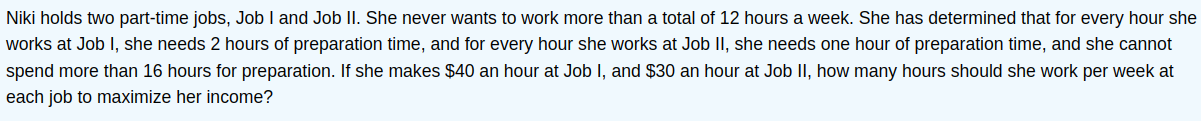


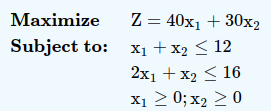

The standard form:

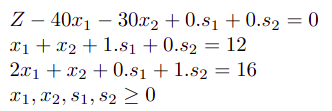

The initial tableau matrix:

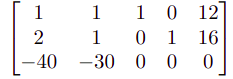

In [11]:
import numpy as np

In [12]:
#tab -> initial tableau matrix
#len_vars-> number of variables
def simplex_algo(tab,len_vars):
    red_flag=False
    print(tab)
    print('--------------------')
    while min(tab[-1])<0:
      i2=min(tab[-1])
      pivot_r=i2
      #for j in range(len(tab)-1):
      list_fr_row=[]
      ind_col=np.where(tab[-1,:] == pivot_r)[0][0]
      for k,C  in zip(tab[:-1,ind_col],tab[:-1,-1]):
             if k!=0:
                  a2=C/k
                  list_fr_row.append(a2)
      if max(list_fr_row)<0:
             red_flag=True
      min_row=list_fr_row.index(min(list_fr_row))
      for i in range(tab.shape[0]):

        if tab[min_row,ind_col]!=0 and i!=min_row:
            to_mul=tab[i,ind_col]/tab[min_row,ind_col]
            tab[i]-=tab[min_row]*to_mul
        tab[min_row]=tab[min_row]/tab[min_row,ind_col]
      if red_flag==False:
         print(tab)
         print('----------------------------------------------')
      elif red_flag==True:
         break

    if red_flag==False:
#dict_final={}
      cols_final={}
      for i in range(len_vars):
  #print(tab[:,i])
        if sum(tab[:,i])==1:
           cols_final[i]=tab[np.where(tab[:,i] == 1)[0][0],-1]
        else:
           cols_final[i]=0

      cols_final['Z']=tab[-1,-1]
      print(cols_final)
    else:
       print('No Solution because of negative ratios: ',list_fr_row)

In [13]:
tab=np.array([[1,1,1,0,12],[2,1,0,1,16],[-40,-30,0,0,0]],dtype='float64')
simplex_algo(tab=tab,len_vars=2)

[[  1.   1.   1.   0.  12.]
 [  2.   1.   0.   1.  16.]
 [-40. -30.   0.   0.   0.]]
--------------------
[[  0.    0.5   1.   -0.5   4. ]
 [  1.    0.5   0.    0.5   8. ]
 [  0.  -10.    0.   20.  320. ]]
----------------------------------------------
[[  0.   1.   2.  -1.   8.]
 [  1.   0.  -1.   1.   4.]
 [  0.   0.  20.  10. 400.]]
----------------------------------------------
{0: 4.0, 1: 8.0, 'Z': 400.0}


The final matrix in the output represents the optimal tableau matrix.
The final solution is 0 or **$x_1$=4**, 1 or **$x_2$=8** and objective function **$Z$=400**

If Niki works 4 hrs at Job1 and 8 hrs in Job2 then she can maximize her income to $400.

# Question2

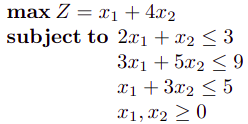

The standard form and initial tableau matrix:

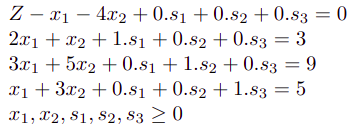

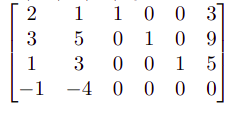

In [14]:
tab=np.array([[2,1,1,0,0,3],[3,5,0,1,0,9],[1,3,0,0,1,5],[-1,-4,0,0,0,0]],dtype='float64')
simplex_algo(tab=tab,len_vars=2)

[[ 2.  1.  1.  0.  0.  3.]
 [ 3.  5.  0.  1.  0.  9.]
 [ 1.  3.  0.  0.  1.  5.]
 [-1. -4.  0.  0.  0.  0.]]
--------------------
[[ 1.66666667  0.          1.          0.         -0.33333333  1.33333333]
 [ 1.33333333  0.          0.          1.         -1.66666667  0.66666667]
 [ 0.33333333  1.          0.          0.          0.33333333  1.66666667]
 [ 0.33333333  0.          0.          0.          1.33333333  6.66666667]]
----------------------------------------------
{0: 0, 1: 1.6666666666666667, 'Z': 6.666666666666667}


$x_1$=0, $x_2$=1.67 and $Z$=6.67

# Question 3

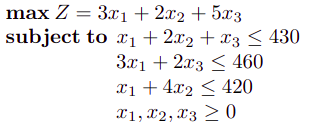

The standard form and initial augmented matrix:

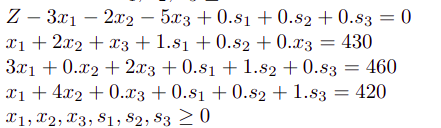

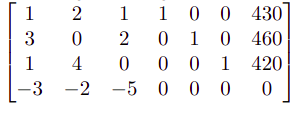

In [15]:
tab=np.array([[1,2,1,1,0,0,430],[3,0,2,0,1,0,460],[1,4,0,0,0,1,420],[-3,-2,-5,0,0,0,0]],dtype='float64')
simplex_algo(tab=tab,len_vars=3)

[[  1.   2.   1.   1.   0.   0. 430.]
 [  3.   0.   2.   0.   1.   0. 460.]
 [  1.   4.   0.   0.   0.   1. 420.]
 [ -3.  -2.  -5.   0.   0.   0.   0.]]
--------------------
[[-5.00e-01  2.00e+00  0.00e+00  1.00e+00 -5.00e-01  0.00e+00  2.00e+02]
 [ 1.50e+00  0.00e+00  1.00e+00  0.00e+00  5.00e-01  0.00e+00  2.30e+02]
 [ 1.00e+00  4.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  4.20e+02]
 [ 4.50e+00 -2.00e+00  0.00e+00  0.00e+00  2.50e+00  0.00e+00  1.15e+03]]
----------------------------------------------
[[-2.50e-01  1.00e+00  0.00e+00  5.00e-01 -2.50e-01  0.00e+00  1.00e+02]
 [ 1.50e+00  0.00e+00  1.00e+00  0.00e+00  5.00e-01  0.00e+00  2.30e+02]
 [ 2.00e+00  0.00e+00  0.00e+00 -2.00e+00  1.00e+00  1.00e+00  2.00e+01]
 [ 4.00e+00  0.00e+00  0.00e+00  1.00e+00  2.00e+00  0.00e+00  1.35e+03]]
----------------------------------------------
{0: 0, 1: 100.0, 2: 230.0, 'Z': 1350.0}


$x_1$=0, $x_2$=100, $x_3$=230, $Z$=1350

# Question 4

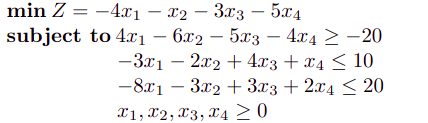

Can also be written as:

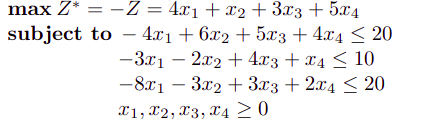

Standard form and augmented matrix-

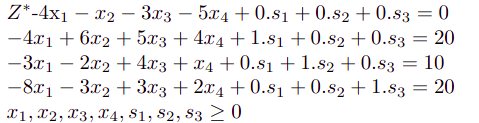

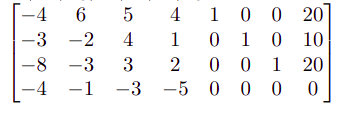

In [16]:
tab=np.array([[-4,6,5,4,1,0,0,20],[-3,-2,4,1,0,1,0,10],[-8,-3,3,2,0,0,1,20],[-4,-1,-3,-5,0,0,0,0]],dtype='float64')
simplex_algo(tab=tab,len_vars=4)

[[-4.  6.  5.  4.  1.  0.  0. 20.]
 [-3. -2.  4.  1.  0.  1.  0. 10.]
 [-8. -3.  3.  2.  0.  0.  1. 20.]
 [-4. -1. -3. -5.  0.  0.  0.  0.]]
--------------------
[[-1.    1.5   1.25  1.    0.25  0.    0.    5.  ]
 [-2.   -3.5   2.75  0.   -0.25  1.    0.    5.  ]
 [-6.   -6.    0.5   0.   -0.5   0.    1.   10.  ]
 [-9.    6.5   3.25  0.    1.25  0.    0.   25.  ]]
----------------------------------------------
No Solution because of negative ratios:  [-5.0, -2.5, -1.6666666666666667]


**No solution**.